# EE769 Introduction to ML Course Project
## Pneumonia Detection using CNN
Team Members

*   Jaideep Kotani - 200070035
*   Pullabhotla Bhuvana Chandra - 200070063
*   Seepana Venkata Sai Siddartha - 200070074


Video Explanation - [Drive](https://drive.google.com/file/d/1kYsBVQhRqH4gNXqKy-Idpz8CT-R4JGvy/view?usp=share_link)

# AI in Medical Diagnosis
Artificial Intelligence (AI) has a significant role in the medical field, including medical diagnosis. It has the potential to assist physicians in making accurate diagnoses, reducing diagnostic errors, and improving patient outcomes. AI can analyze large amounts of patient data to identify patterns and predict potential diseases. 

In medical imaging, computer vision, a subfield of AI, can be applied to various specialities such as dermatology, ophthalmology, and histopathology to diagnose and treat diseases more accurately and efficiently. 

Pre-trained neural networks can use X-ray images to make disease predictions on chest X-rays, which is critical for detecting lung cancer, pneumonia, and other respiratory diseases. We can use the chest X-ray images in the ChestX-ray8 dataset to train and test AI models. 

Using AI for medical diagnosis can improve disease detection accuracy and efficiency, leading to better patient outcomes and potentially saving lives.

# Pneumonia

Pneumonia is a respiratory infection that inflames the air sacs in one or both lungs, causing them to fill with fluid or pus (purulent material). Bacteria, viruses, or fungi can cause it, and symptoms include cough with phlegm or pus, fever, chills, and difficulty breathing. Pneumonia can range in severity from mild to life-threatening and is most serious for infants and young children, people older than 65, and those with health problems or weakened immune systems.


# Use of ML in Pneumonia Detection
To improve the accuracy and efficiency of pneumonia diagnosis Machine Learning (ML) is used. ML algorithms can analyze medical images and help detect pneumonia earlier than traditional methods, improving patient outcomes. ML can also help physicians identify patients at higher risk of pneumonia and recommend appropriate preventative measures.

# Computer Vision in Pneumonia Detection
Computer vision is an interdisciplinary scientific field that seeks to understand and automate tasks that the human visual system can do, such as gaining a high-level understanding of digital images or videos. In AI, computer vision interprets and analyses images and videos, including medical images. 

To improve the accuracy of the pneumonia detection model, we use Convolutional Neural Networks (CNN) with transfer learning from DenseNet and ResNet architectures in the project. Training the CNN on a dataset of medical images enables computer vision to automatically identify signs of pneumonia in X-rays or CT scans, which can help determine whether a person is affected by pneumonia.

The feature extraction performed consists of three basic operations:

* Filter an image for a particular feature (convolution)
* Detect that feature within the filtered image (using the ReLU activation)
* Condense the image to enhance the features (maximum pooling)

# Convolution Process
Convolution is a crucial process in Convolutional Neural Networks (CNNs), as demonstrated below. Applying different convolution filters with distinct dimensions or values leads to extracting various features, which the neural network identifies using the rectified linear unit (ReLu) activation function on each destination pixel. Furthermore, to further enhance the extracted features, the network utilizes MaxPool layers. 

The neural network establishes the distance between each filter using the stride parameter and determines whether to ignore the border pixels using the padding parameter. To obtain information on the borders, the neural network adds zeros. After this convolution process, the neural network concatenates the outputs in Dense layers. Finally, by employing a sigmoid activation function, the neural network determines the image's class to which it belongs.

#  Import Packages and Functions
We'll make use of the following packages:

* numpy and pandas is what we'll use to manipulate our data
* matplotlib.pyplot and seaborn will be used to produce plots for visualization
* util will provide the locally defined utility functions that have been provided for this assignment
We will also use several modules from the keras framework for building deep learning models.

Run the next cell to import all the necessary packages.



In [ ]:
# Installing the Kaggle package to import the dataset
!pip install -q kaggle

In [ ]:
# Allows the user to upload a file to the Colaboratory notebook environment.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"jaideepk3","key":"a2c16956d6f966e2659e36040e4dbe1c"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle
# copies a file called kaggle.json to the .kaggle directory in the user's home directory

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json
# changes the permissions of the kaggle.json file in the .kaggle directory to be readable and writable only by the owner of the file

In [ ]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                          Spotify and Youtube                                   9MB  2023-03-20 15:43:25          11287        394  1.0              
arnabchaki/data-science-salaries-2023                          Data Science Salaries 2023  💸                        25KB  2023-04-13 09:55:16           5419        134  1.0              
erdemtaha/cancer-data                                          Cancer Data                                          49KB  2023-03-22 07:57:00           5717        115  1.0              
evangower/premier-league-2022-2023                             Pr

In [ ]:
!kaggle datasets download -d bhuvanachandra20/chest-xray-dataset
# downloads a dataset called chest-xray-pneumonia from Kaggle using the kaggle datasets download command

chest-xray-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip chest-xray-dataset.zip
# command being run is 'unzip', which extracts the contents of a zip file

Archive:  chest-xray-dataset.zip
replace chest_xray/test/NORMAL/NORMAL2-IM-0274-0001.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

os.listdir("/content/chest_xray")


['val', 'train', 'test']

In [ ]:
len(os.listdir("/content/chest_xray"))

3

The dataset is divided into three sets: 1) Train set 2) Validation set and 3) Test set.

# Data Visualization


Train set:
PNEUMONIA=818
NORMAL=308
Test set:
PNEUMONIA=188
NORMAL=84
Validation set:
PNEUMONIA=8
NORMAL=8


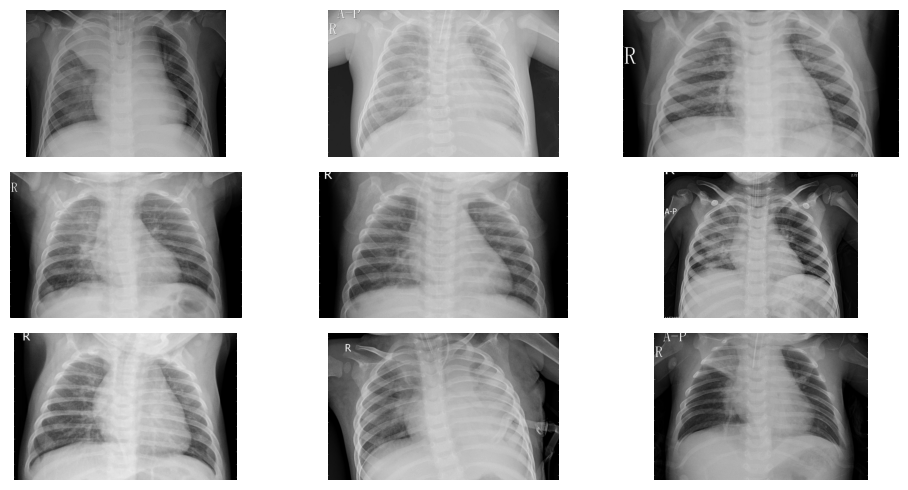

In [ ]:
# Set directories for the train, test and validation sets
train_dir = "../content/chest_xray/train"
test_dir = "../content/chest_xray/test"
val_dir = "../content/chest_xray/val"

print("Train set:\n========================================")
# Print information about the train set
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}") # Print number of pneumonia images in the train set
print(f"NORMAL={num_normal}") # Print number of normal images in the train set

# Print information about the test set
print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")  # Print number of pneumonia images in the test set
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")  # Print number of normal images in the test set

# Print information about the validation set
print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}") # Print number of pneumonia images in the validation set
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}") # Print number of normal images in the validation set

pneumonia = os.listdir("../content/chest_xray/train/PNEUMONIA")
pneumonia_dir = "../content/chest_xray/train/PNEUMONIA"
# Sets directory for pneumonia images in the train set


# Plot the first 9 images of the pneumonia class in the train set
plt.figure(figsize=(10, 5)) # Setting up the plot to display images

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

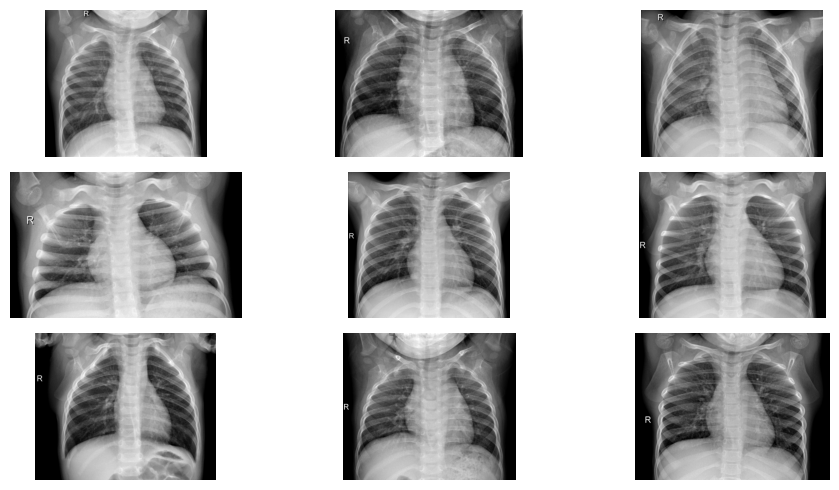

In [ ]:
normal = os.listdir("../content/chest_xray/train/NORMAL") # Listing all the normal images in the train directory
normal_dir = "../content/chest_xray/train/NORMAL" # Storing the directory path of normal images in a variable

plt.figure(figsize=(10, 5))  # Setting up the plot to display images

# Looping through the first 9 normal images
for i in range(9):
    plt.subplot(3, 3, i + 1)  # Setting up a subplot for each image

    # Reading in the image and displaying it in grayscale
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')   

    plt.axis('off')
    
plt.tight_layout()
# Adjusting the layout of the plot to prevent overlap

Displaying a grayscale image of a chest X-ray. Few stats of the images are shown

The dimensions of the image are 1438 pixels width and 1588 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 131.4152 and the standard deviation is 62.0410


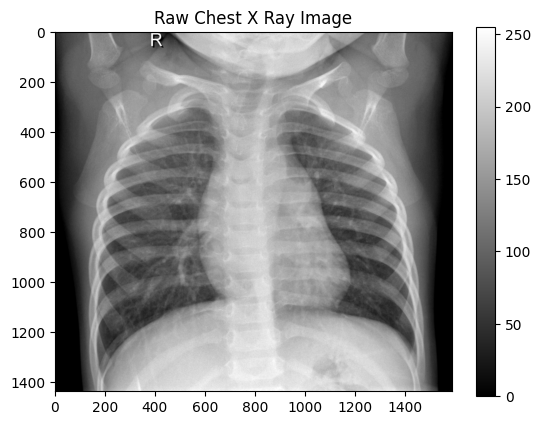

In [ ]:
normal_img = os.listdir("../content/chest_xray/train/NORMAL")[0]
# Accessing the first image file from the NORMAL directory and storing it in 'normal_img'

normal_dir = "../content/chest_xray/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
# Reading the image

plt.imshow(sample_img, cmap='gray')
plt.colorbar()  # Adding a color bar to the image
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

# Investigate pixel value distribution
Generating a distribution plot of the pixel intensities in an image using Seaborn library, and adding a legend displaying the mean and standard deviation of the pixel intensities. Plot provides a visual representation of the pixel intensity distribution.

<ipython-input-14-3b8ca72a2fb9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_img.ravel(), label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)


Text(0, 0.5, '# Pixels in Image')

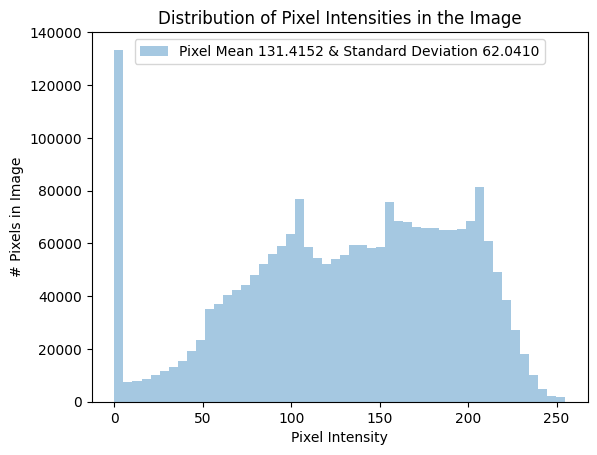

In [ ]:
# Create a distribution plot of the flattened image intensity values
sns.distplot(sample_img.ravel(), label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)

plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# 2. Image Preprocessing
To prepare the images for training a convolutional neural network, we will perform image preprocessing and data augmentation using the Keras ImageDataGenerator function. This function provides basic data augmentation, such as random horizontal flipping of images. 

We will also standardize the input distribution by transforming the values in each batch so that their mean is 0 and their standard deviation is 1, which facilitates model training. Additionally, we will convert our single-channel X-ray images (grayscale) to a three-channel format by repeating the values in the image across all channels. This is necessary because the pre-trained model we will use requires three-channel inputs.

In [ ]:
# Import the ImageDataGenerator class from the Keras library
from keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator class and set the desired image augmentation parameters
data_gen = ImageDataGenerator(
    rotation_range=20,   # Randomly rotate images within the range of 0 to 20 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally within 10% of the image width
    shear_range=0.1,  # Randomly apply shearing transformations within the range of 0 to 10 degrees
    zoom_range=0.1, # Randomly zoom images within the range of 0 to 10%
    samplewise_center=True,  # Subtract the mean of each sample from itself
    samplewise_std_normalization=True # Divide each input by its standard deviation
)

# Separate generator for valid and test sets
Creating a new generator for our validation and testing data instead of using the same generator as for the training data. The reason for this is that the generator for the training data normalizes each image per batch using batch statistics. 

However, we should not do this with the test and validation data because in a real-life scenario, we process one image at a time. If we use batch statistics for test data, it could give our model an unfair advantage, which is not desirable. Instead, we should normalize incoming test data using the statistics computed from the training set.

In [ ]:
# Create a data generator for the training set images
train = data_gen.flow_from_directory(train_dir, batch_size=8, shuffle=True, class_mode='binary', target_size=(224, 224))

# Create a data generator for the validation set images
validation = data_gen.flow_from_directory(val_dir, batch_size=1,  shuffle=False, class_mode='binary', target_size=(224, 224))

# Create a data generator for the test set images
test = data_gen.flow_from_directory(test_dir,  batch_size=1, shuffle=False, class_mode='binary', target_size=(224, 224))

Found 1126 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 272 images belonging to 2 classes.


Displaying a generated chest X-ray image with its corresponding label. The pixel values statistics of the image are printed, including the dimensions, maximum/minimum pixel values, mean and standard deviation of the pixel values.

The dimensions of the image are 224 pixels width and 224 pixels height, one single color channel.
The maximum pixel value is 2.5221 and the minimum is -4.1832
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


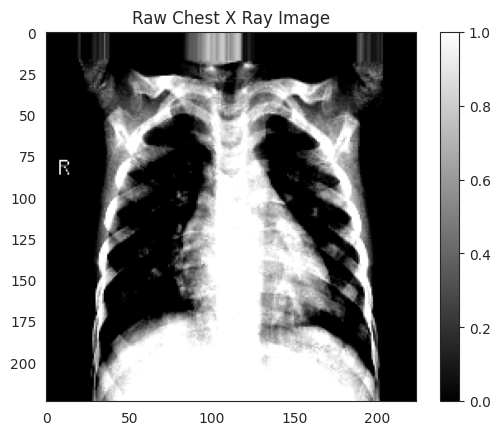

In [ ]:
sns.set_style('white')
gen_img, label = train.__getitem__(0) # Get a generated image and its label from the train dataset
plt.imshow(gen_img[0], cmap='gray') # Display the generated image with a grayscale colormap
plt.colorbar()
plt.title('Raw Chest X Ray Image')

# Print out the dimensions, maximum and minimum pixel values, and the mean and standard deviation of the pixel values
print(f"The dimensions of the image are {gen_img.shape[1]} pixels width and {gen_img.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {gen_img.max():.4f} and the minimum is {gen_img.min():.4f}")
print(f"The mean value of the pixels is {gen_img.mean():.4f} and the standard deviation is {gen_img.std():.4f}")

<ipython-input-18-360cbbd65f0d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gen_img.ravel(), label=f"Pixel Mean {np.mean(gen_img):.4f} & Standard Deviation {np.std(gen_img):.4f}", kde=False)


Text(0, 0.5, '# Pixels in Image')

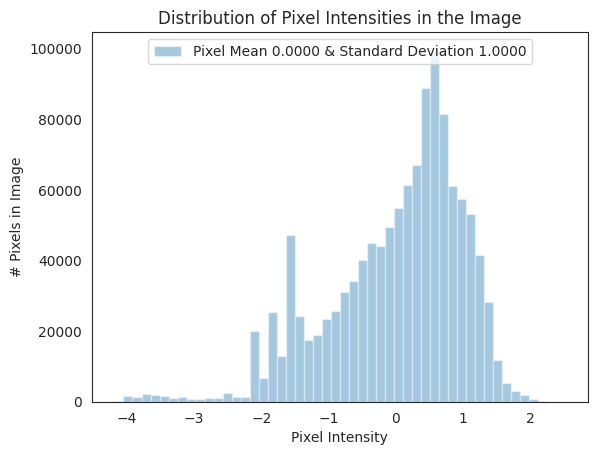

In [ ]:
# Creating a distribution plot of the flattened generated image intensity values
sns.distplot(gen_img.ravel(), label=f"Pixel Mean {np.mean(gen_img):.4f} & Standard Deviation {np.std(gen_img):.4f}", kde=False)

plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# Building a CNN model

## Impact of imbalance data on loss function

Loss Function:
$$\mathcal{L}_{cross-entropy}(x_i) = -(y_i \log(f(x_i)) + (1-y_i) \log(1-f(x_i))),$$

We can rewrite the the overall average cross-entropy loss over the entire training set `D` of size `N` as follows:
$$\mathcal{L}_{cross-entropy}(\mathcal{D}) = - \frac{1}{N}\big( \sum_{\text{positive examples}} \log (f(x_i)) + \sum_{\text{negative examples}} \log(1-f(x_i)) \big).$$



When we have an imbalance data, using a normal loss function will result a model that bias toward the dominating class. One solution is to use a weighted loss function. Using weighted loss function will balance the contribution in the loss function.

$$\mathcal{L}_{cross-entropy}^{w}(x) = - (w_{p} y \log(f(x)) + w_{n}(1-y) \log( 1 - f(x) ) ).$$

In [ ]:
# Calculate the class weights for the two classes (normal and pneumonia)
# based on the number of samples in each class
weight_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_1 = num_normal / (num_normal + num_pneumonia)

# Create a dictionary that maps each class to its corresponding weight
class_weight = {0: weight_0, 1: weight_1}

# Print the class weights for each class
print(f"Weight for class 0: {weight_0:.2f}")
print(f"Weight for class 1: {weight_1:.2f}")

Weight for class 0: 0.73
Weight for class 1: 0.27


Creating a convolutional neural network using the Keras library, consisting of multiple convolutional layers, batch normalization layers, max pooling layers, and dense layers with dropout. The network is compiled with binary crossentropy loss and the Adam optimizer.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization

# Initialize the model
cnn_model = Sequential()

# Add the first convolutional layer with 32 filters, a kernel size of 3x3, and a ReLU activation function
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'))\

# Add batch normalization layer
cnn_model.add(BatchNormalization())

# Add another convolutional layer with 32 filters and a kernel size of 3x3
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'))

# Add another batch normalization layer
cnn_model.add(BatchNormalization())

# Add a max pooling layer with a pool size of 2x2
cnn_model.add(MaxPool2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 filters and a kernel size of 3x3
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten the output of the previous layer
cnn_model.add(Flatten())

# Add a fully connected layer with 128 units and a ReLU activation function
cnn_model.add(Dense(128, activation='relu'))

# Add a dropout layer with a rate of 0.2
cnn_model.add(Dropout(0.2))

# Add a final output layer with a sigmoid activation function
cnn_model.add(Dense(1, activation='sigmoid'))

# Compiling the model with binary crossentropy loss, the Adam optimizer, and accuracy as a metric
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 220, 220, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                        

Training the model on the given training data for 5 epochs while using validation data to monitor performance. It uses class weight to handle class imbalance and specifies the number of batches for training and validation data for each epoch.

In [ ]:
cnn_model_fit = cnn_model.fit(
    train, 
    epochs=5,
    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=10,
    validation_steps=10,
)

Epoch 1/5
10/10 [==============================] - 67s 7s/step - loss: 5.7197 - accuracy: 0.5625 - val_loss: 2.2087 - val_accuracy: 0.8000
Epoch 2/5
10/10 [==============================] - 36s 4s/step - loss: 2.2270 - accuracy: 0.7125 - val_loss: 12.6891 - val_accuracy: 0.3000
Epoch 3/5
10/10 [==============================] - 38s 4s/step - loss: 0.7829 - accuracy: 0.6250 - val_loss: 20.5776 - val_accuracy: 0.2000
Epoch 4/5
10/10 [==============================] - 36s 4s/step - loss: 0.4256 - accuracy: 0.8375 - val_loss: 8.3366 - val_accuracy: 0.4000
Epoch 5/5
10/10 [==============================] - 36s 3s/step - loss: 0.2759 - accuracy: 0.8250 - val_loss: 2.2075 - val_accuracy: 0.4000


Creating a figure with two subplots, and plotting the loss and accuracy values of the model during training and validation. The plots showing the labels for training and validation loss/accuracy.

Text(0.5, 1.0, 'Accuracy Evolution')

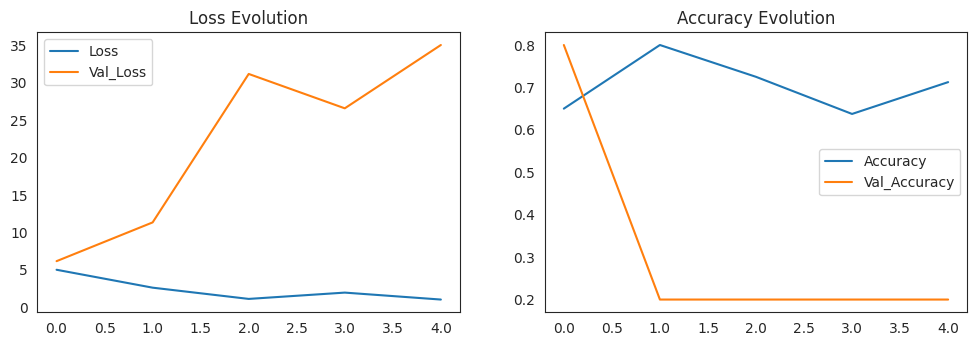

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(cnn_model_fit.history['loss'], label='Loss') # Plot the training loss values from the model history
plt.plot(cnn_model_fit.history['val_loss'], label='Val_Loss') # Plot the validation loss values from the model history
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(cnn_model_fit.history['accuracy'], label='Accuracy') # Plot the training accuracy values from the model history
plt.plot(cnn_model_fit.history['val_accuracy'], label='Val_Accuracy') # # Plot the validation accuracy values from the model history
plt.legend()
plt.title('Accuracy Evolution')

Evaluates and prints the accuracy of a trained model on the test and train sets, respectively.

In [ ]:
evaluation = cnn_model.evaluate(test) # Evaluate the model on the test set and print the test accuracy
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = cnn_model.evaluate(train) # Evaluate the model on the train set and print the train accura
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

272/272 [==============================] - 31s 114ms/step - loss: 14.3141 - accuracy: 0.6912
Test Accuracy: 69.12%
141/141 [==============================] - 129s 909ms/step - loss: 10.4454 - accuracy: 0.7265
Train Accuracy: 72.65%


Computing the confusion matrix and classification report for a binary classification model's predictions on a test set. The confusion matrix is printed to the screen, and the classification report is displayed as a pandas DataFrame.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set using the trained model
pred = cnn_model.predict(test)

# Generate and print the confusion matrix for the test set
print(confusion_matrix(test.classes, pred > 0.5))

# Generate and display the classification report for the test set as a pandas DataFrame
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

272/272 [==============================] - 31s 114ms/step
[[  0  84]
 [  0 188]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,accuracy,macro avg,weighted avg
precision,0.0,0.691176,0.691176,0.345588,0.477725
recall,0.0,1.000000,0.691176,0.500000,0.691176
f1-score,0.0,0.817391,0.691176,0.408696,0.564962
support,84.0,188.000000,0.691176,272.000000,272.000000


# Transfer Learning
# DenseNet

DenseNet is a type of convolutional neural network that uses transfer learning, where each layer is connected to all other layers that are deeper in the network. This means that the first layer is connected to the second, third, fourth, and so on, and the second layer is connected to the third, fourth, fifth, and so on. 

For more information about the DenseNet architecture, you can refer to this website: https://keras.io/api/applications/densenet/

This code uses Keras library to create a DenseNet121 base model with pre-trained weights from the ImageNet dataset and average pooling as the output layer. It then prints a summary of the model architecture and its parameters.

In [ ]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

# Create a DenseNet121 base model with input shape of (224, 224, 3), without the final fully-connected layer
# and pre-trained weights from ImageNet
base_model = DenseNet121(input_shape=(224, 224, 3), include_top=False, weights='imagenet', pooling='avg')

# Print a summary of the model architecture and its parameters
base_model.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                       

In [ ]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [ ]:
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The input shape KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")


Creating a new deep learning model using the DenseNet121 pre-trained on ImageNet dataset. A new dense layer is added to the model to output binary classification predictions, and the model is compiled using binary cross-entropy loss, Adam optimizer, and accuracy as a metric.

In [ ]:
#cnn_model = Sequential()
# Load the DenseNet121 model pre-trained on the ImageNet dataset without the top classification layer
base_densenet_model = DenseNet121(include_top=False, weights='imagenet')
x = base_densenet_model.output

# Add a global average pooling layer
x = GlobalAveragePooling2D()(x)

# Add a dense layer with sigmoid activation function
predictions = Dense(1, activation="sigmoid")(x)

# Create a new model with the base model's input and the new dense layer as output
densenet_model = Model(inputs=base_densenet_model.input, outputs=predictions)
    #densenet_model.add(base_densenet_model)
    #densenet_model.add(GlobalAveragePooling2D())
    #densenet_model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss, Adam optimizer, and accuracy as a metric
densenet_model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])

Training the model using the given training data and specified parameters, including the number of epochs, validation data, class weights, and steps per epoch. The trained model and history are saved in the 'r' variable.

In [ ]:
densenet_model_fit = densenet_model.fit(
    train, 
    epochs=5,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=10,
    validation_steps=10,
)

Epoch 1/5
10/10 [==============================] - 78s 8s/step - loss: 0.1422 - accuracy: 0.8500 - val_loss: 0.5106 - val_accuracy: 0.7000
Epoch 2/5
10/10 [==============================] - 66s 7s/step - loss: 0.1493 - accuracy: 0.8750 - val_loss: 21.6746 - val_accuracy: 0.2000
Epoch 3/5
10/10 [==============================] - 65s 6s/step - loss: 0.2177 - accuracy: 0.8125 - val_loss: 35.7987 - val_accuracy: 0.2000
Epoch 4/5
10/10 [==============================] - 69s 7s/step - loss: 0.2425 - accuracy: 0.6750 - val_loss: 9.7852 - val_accuracy: 0.4000
Epoch 5/5
10/10 [==============================] - 85s 9s/step - loss: 0.1955 - accuracy: 0.8375 - val_loss: 4.6721 - val_accuracy: 0.8000


Using the DenseNet base model to predict features of the validation and training data, and then reshape these features into a 2D array with the number of rows equal to the number of data points and the number of columns equal to the number of features.

In [ ]:
#  Predicting the features of the validation data
validation_features_densenet = base_densenet_model.predict(validation)

# Reshape the validation data features to have a 2D shape, with the number of rows equal to the number of data points and the number of columns equal to the number of features
validation_fea_den = np.reshape(validation_features_densenet, (validation_features_densenet.shape[0], -1))

# Predicting the features of the training data
train_densenet = base_densenet_model.predict(train)

# Reshape again
train_fea_den= train_densenet.reshape(train_densenet.shape[0], -1)

141/141 [==============================] - 186s 1s/step


Training a SVM classifier with a linear kernel using training data and generates predictions for validation data. It then prints the classification report of the model's performance using actual and predicted labels.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

# Create an SVM classifier with a linear kernel
svc = svm.SVC(kernel='linear')

# Fit the classifier to the training data
svc.fit(train_fea_den, train.labels)

# Use the classifier to predict the labels of the validation data
svm_predictions = svc.predict(validation_fea_den)

print("Classification Report for Densenet with SVM:",classification_report(validation.labels, svm_predictions))

Classification Report for Densenet with SVM:               precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.50      0.88      0.64         8

    accuracy                           0.50        16
   macro avg       0.50      0.50      0.42        16
weighted avg       0.50      0.50      0.42        16



Training a RandomForestClassifier model using training data, making predictions on validation data, and printing a classification report containing precision, recall, F1-score, and support for each class in the validation set.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a RandomForestClassifier object with 100 estimators and random state 42
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf.fit(train_fea_den, train.labels)

# Use the trained classifier to predict the labels of the validation data
rf_predictions_den = rf.predict(validation_fea_den)

print("Classification Report for Densenet with RandomForest:",classification_report(validation.labels, rf_predictions_den))

Classification Report for Densenet with RandomForest:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.50      1.00      0.67         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Creating a figure with 2 subplots, where the first subplot shows the loss evolution and the second subplot shows the accuracy evolution during training and validation of a model. The plots display the training and validation loss/accuracy.

Text(0.5, 1.0, 'Accuracy Evolution')

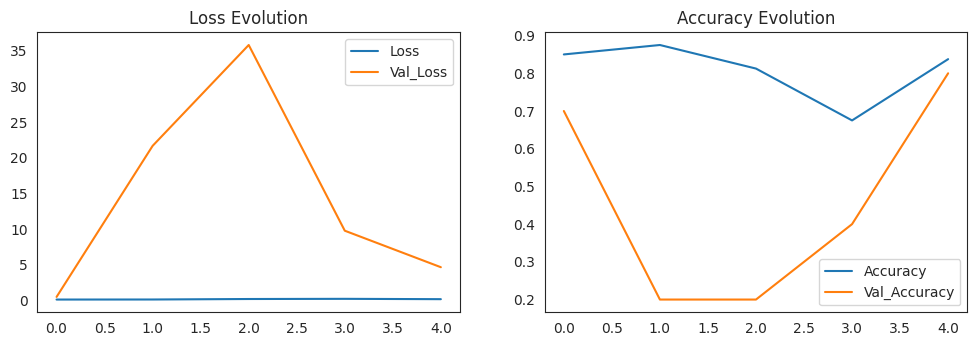

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)

# Plot the training loss and validation loss on the selected plot
plt.plot(densenet_model_fit.history['loss'], label='Loss')
plt.plot(densenet_model_fit.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)

# Plot the training accuracy and validation accuracy on the selected plot
plt.plot(densenet_model_fit.history['accuracy'], label='Accuracy')
plt.plot(densenet_model_fit.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation = densenet_model.evaluate(test) # Evaluate the model on the test dataset and print the test accuracy
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = densenet_model.evaluate(train)  # Evaluate the model on the training dataset and print the training accuracy
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

272/272 [==============================] - 53s 195ms/step - loss: 14.4608 - accuracy: 0.3088
Test Accuracy: 30.88%
141/141 [==============================] - 184s 1s/step - loss: 15.4197 - accuracy: 0.2735
Train Accuracy: 27.35%


# Evaluation

In [ ]:
# Use the trained model to predict on the test data and threshold the predicted values at 0.5
predicted_vals = densenet_model.predict(test, steps=len(test))

# Generate a confusion matrix using the true class labels and the predicted binary values
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

272/272 [==============================] - 53s 194ms/step
[[ 84   0]
 [188   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,accuracy,macro avg,weighted avg
precision,0.308824,0.0,0.308824,0.154412,0.095372
recall,1.000000,0.0,0.308824,0.500000,0.308824
f1-score,0.471910,0.0,0.308824,0.235955,0.145737
support,84.000000,188.0,0.308824,272.000000,272.000000


# VGG16
VGG16 is a pre-trained neural network with a classical architecture of convolutional layers, pooling layers, and a dense network with 2 hidden layers, each with 4096 nodes and one output layer with 1000 nodes. Its use of 3x3 filters allows it to capture fine image details, making it a popular choice for transfer learning in image classification, including medical image analysis. 

By leveraging VGG16's pre-trained weights, your model can achieve higher accuracy in identifying patterns and features in medical images.

In [ ]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG16

# Load the VGG16 base model with the specified input shape and pretrained weights
base_vgg16_model = VGG16(input_shape=(180,180,3), include_top=False, weights='imagenet')

In [ ]:
base_vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

Defining a Sequential model in Keras, using the VGG16 base model and adding multiple Dense, BatchNormalization and Dropout layers with different configurations to prevent overfitting, followed by a final Dense layer with sigmoid activation for binary classification.

In [ ]:
vgg16_model = tf.keras.Sequential([
        base_vgg16_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

In [ ]:
# Create an Adam optimizer with a learning rate of 0.001
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Define a list of metrics to be used for model evaluation, including accuracy, precision, and recall
METRICS = ['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

# Compile the VGG16 model with the Adam optimizer, binary crossentropy loss, and the list of evaluation metrics
vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

Training a VGG16 model on the given train data for 10 epochs and performing validation during training on the validation data. It sets class weights to account for class imbalance, and the resulting trained model and information are stored in `r`.

In [ ]:
vgg16_model_fit = vgg16_model.fit(train,
          epochs=5,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=10,
          validation_steps=10)

Epoch 1/5
10/10 [==============================] - 183s 18s/step - loss: 0.3899 - accuracy: 0.4125 - precision: 0.6875 - recall: 0.3729 - val_loss: 832.7711 - val_accuracy: 0.2000 - val_precision: 0.2000 - val_recall: 1.0000
Epoch 2/5
10/10 [==============================] - 172s 17s/step - loss: 0.2847 - accuracy: 0.6375 - precision: 0.8889 - recall: 0.5614 - val_loss: 2432.8582 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/5
10/10 [==============================] - 165s 17s/step - loss: 0.2297 - accuracy: 0.7051 - precision: 0.8605 - recall: 0.6852 - val_loss: 627.4250 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/5
10/10 [==============================] - 171s 17s/step - loss: 0.2049 - accuracy: 0.7375 - precision: 0.9500 - recall: 0.6667 - val_loss: 99.9319 - val_accuracy: 0.2000 - val_precision: 0.2000 - val_recall: 1.0000
Epoch 5/5
10/10 [==============================] - 167s 17s/step - loss: 0.2527 - ac

Predicting the features for the validation and training sets using a pre-trained VGG16 model. It then reshapes these features into a 2D shape for further processing.

In [ ]:
# Predict features for validation set using the VGG16 model
validation_features_vgg16 = vgg16_model.predict(validation)  

# Reshape the validation set features to have a 2D shape
validation_fea_vgg16 = np.reshape(validation_features_vgg16, (validation_features_vgg16.shape[0], -1))

train_vgg16 = vgg16_model.predict(train)
train_fea_vgg16= train_vgg16.reshape(train_vgg16.shape[0], -1)

141/141 [==============================] - 637s 5s/step


Creating SVM with a linear kernel, trains it on the VGG16 features and corresponding labels, predicts the labels for the validation set, and prints the classification report for the predictions

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

svc = svm.SVC(kernel='linear')  # Create a support vector classifier with a linear kernel
svc.fit(train_fea_vgg16, train.labels)  # Train the classifier using the VGG16 features and corresponding labels
svm_predictions_vgg16 = svc.predict(validation_fea_vgg16) # Use the trained classifier to predict labels for the validation set

print("Classification Report for VGG16 with SVM:\n",classification_report(validation.labels, svm_predictions_vgg16))

Classification Report for VGG16 with SVM:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.50      1.00      0.67         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate a RandomForestClassifier object
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Instantiate a RandomForestClassifier object
rf.fit(train_fea_vgg16, train.labels) # Train the classifier on the training set
rf_predictions_vgg16 = rf.predict(validation_fea_vgg16) # Use the classifier to make predictions on the validation set

print("Classification Report for VGG16 with RandomForest:\n",classification_report(validation.labels, rf_predictions_vgg16))

Classification Report for VGG16 with RandomForest:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.50      1.00      0.67         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Creating figure with two subplots to display the evolution of the loss and accuracy during training and validation of a machine learning model

Text(0.5, 1.0, 'Accuracy Evolution')

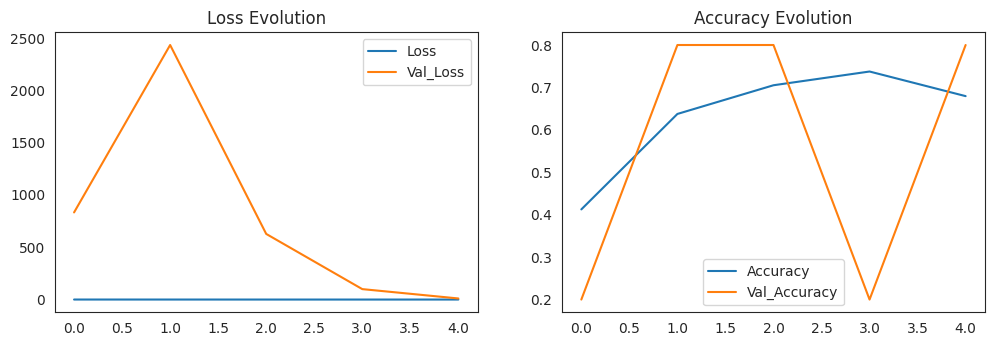

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(vgg16_model_fit.history['loss'], label='Loss')
plt.plot(vgg16_model_fit.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(vgg16_model_fit.history['accuracy'], label='Accuracy')
plt.plot(vgg16_model_fit.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

Evaluating a pre-trained VGG16 model on test and train datasets and prints their respective accuracies as a percentage with two decimal places.

In [ ]:
evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

272/272 [==============================] - 155s 570ms/step - loss: 37.4807 - accuracy: 0.3088 - precision: 0.0000e+00 - recall: 0.0000e+00
Test Accuracy: 30.88%
141/141 [==============================] - 639s 5s/step - loss: 38.7829 - accuracy: 0.2735 - precision: 0.0000e+00 - recall: 0.0000e+00
Train Accuracy: 27.35%


# ResNet

See the full explanation and schemes in the Research Paper on Deep Residual Learning (https://arxiv.org/pdf/1512.03385.pdf)

Initializing a pre-trained ResNet50 model for transfer learning in Keras with an input and excludes the fully connected layers at the top, while using the pre-trained weights from the ImageNet dataset for the initialization.

In [ ]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D

base_resnet_model = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
base_resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1_conv[0][0]']      

Defining a ResNet model with several fully connected layers, batch normalization, and dropout to reduce overfitting. The model is compiled using the binary crossentropy loss function, Adam optimizer, and accuracy, precision, and recall metrics.

In [ ]:
resnet_model = tf.keras.Sequential([
        base_resnet_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = ['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

Fitting a ResNet model to training data for 5 epochs using the `fit` function with validation, class weights, and steps per epoch specified. The training process is stored in the `resnet_model_fit` variable to visualize the training and validation loss and accuracy over time.

In [ ]:
resnet_model_fit = resnet_model.fit(train,
          epochs=5,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=10,
          validation_steps=10)

Epoch 1/5
10/10 [==============================] - 98s 7s/step - loss: 0.4042 - accuracy: 0.5625 - precision: 0.6667 - recall: 0.5417 - val_loss: 2.8239 - val_accuracy: 0.2000 - val_precision: 0.2000 - val_recall: 1.0000
Epoch 2/5
10/10 [==============================] - 74s 7s/step - loss: 0.3871 - accuracy: 0.4500 - precision: 0.7297 - recall: 0.4426 - val_loss: 87.5255 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/5
10/10 [==============================] - 66s 6s/step - loss: 0.2708 - accuracy: 0.6250 - precision: 0.8537 - recall: 0.5932 - val_loss: 216.0721 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/5
10/10 [==============================] - 64s 7s/step - loss: 0.2845 - accuracy: 0.6625 - precision: 0.7907 - recall: 0.6538 - val_loss: 954.7717 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/5
10/10 [==============================] - 65s 7s/step - loss: 0.1947 - accurac

Using the pre-trained ResNet model to predict features of the validation and training images. The predicted features are then reshaped into a 2D format and stored in separate variables for further processing.

In [ ]:
validation_features_resnet = base_resnet_model.predict(validation)
validation_fea_resnet = np.reshape(validation_features_resnet, (validation_features_resnet.shape[0], -1))

train_resnet=base_resnet_model.predict(train)
train_fea_resnet= train_resnet.reshape(train_resnet.shape[0], -1)

141/141 [==============================] - 214s 2s/step


Training SVM classifier with a linear kernel on features extracted by Resnet from the training set, generates predictions on the validation set, and prints a classification report

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

svc = svm.SVC(kernel='linear')
svc.fit(train_fea_resnet, train.labels)
svm_predictions_resnet= svc.predict(validation_fea_resnet)

print("Classification Report for Resnet with SVM:\n",classification_report(validation.labels, svm_predictions_resnet))

Classification Report for Resnet with SVM:
               precision    recall  f1-score   support

           0       0.33      0.38      0.35         8
           1       0.29      0.25      0.27         8

    accuracy                           0.31        16
   macro avg       0.31      0.31      0.31        16
weighted avg       0.31      0.31      0.31        16



Training Random Forest classifier on features extracted by Resnet from the training set, generates predictions on the validation set, and prints a classification report

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_fea_resnet, train.labels)
rf_predictions_resnet = rf.predict(validation_fea_resnet)

print("Classification Report for Resnet with RandomForest:\n",classification_report(validation.labels, rf_predictions_resnet))

Classification Report for Resnet with RandomForest:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.50      1.00      0.67         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Creating figure with two subplots to display the evolution of the loss and accuracy during training and validation of a machine learning model

Text(0.5, 1.0, 'Accuracy Evolution')

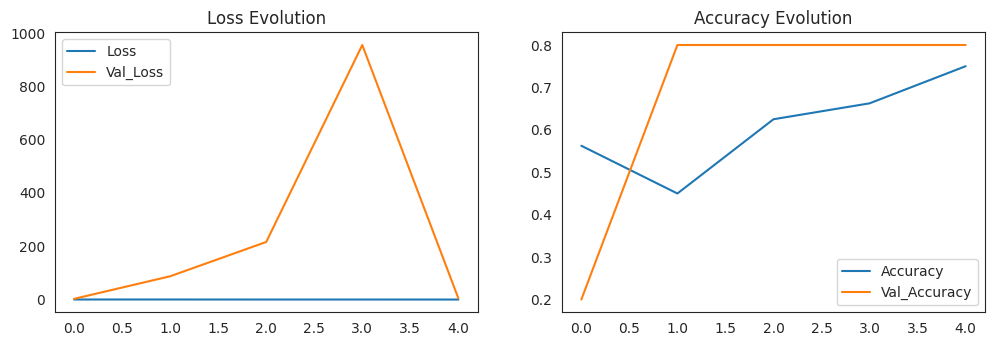

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(resnet_model_fit.history['loss'], label='Loss')
plt.plot(resnet_model_fit.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(resnet_model_fit.history['accuracy'], label='Accuracy')
plt.plot(resnet_model_fit.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

Evaluating the pre-trained ResNet model on test and train datasets and prints their respective accuracies as a percentage with two decimal places.

In [ ]:
evaluation = resnet_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = resnet_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

272/272 [==============================] - 61s 222ms/step - loss: 16.2342 - accuracy: 0.3088 - precision: 0.0000e+00 - recall: 0.0000e+00
Test Accuracy: 30.88%
141/141 [==============================] - 220s 2s/step - loss: 17.3520 - accuracy: 0.2735 - precision: 0.0000e+00 - recall: 0.0000e+00
Train Accuracy: 27.35%


# References
*   Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning - [Link](https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5)
*   Pneumonia Detection Using CNN based Feature Extraction [Link](https://ieeexplore.ieee.org/document/8869364)
*   Dataset that we used and modified [Link](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia?datasetId=17810&sortBy=voteCount)
*   Reference Notebook 1 [Link](https://www.kaggle.com/code/georgiisirotenko/pytorch-x-ray-transfer-learning-densenet)
*   Reference Notebook 2 [Link](https://www.kaggle.com/code/mustafacicek/chest-x-rays-densenet121-transfer-learning#Test-Set-Performance)
*   Reference Notebook 3 [Link](https://www.kaggle.com/code/mustafacicek/chest-x-rays-densenet121-transfer-learning#Test-Set-Performance)
*   DenseNet - Keras [Link](https://keras.io/api/applications/densenet/)
*   ResNet - Keras [Link](https://keras.io/api/applications/resnet/)
*   VGG16 - Keras [Link](https://keras.io/api/applications/vgg/)
*   Transfer Learning [Link](https://keras.io/guides/transfer_learning/)

